<a href="https://colab.research.google.com/github/talisma-cassoma/pcb-components-detection-recognition/blob/main/pccb_components_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!nvidia-smi

Tue Nov 16 20:56:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 9959, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 9959 (delta 13), reused 15 (delta 9), pack-reused 9928
Receiving objects: 100% (9959/9959), 10.32 MiB | 24.64 MiB/s, done.
Resolving deltas: 100% (6895/6895), done.


In [ ]:
#copiar e colar a pasta yolov5 para o meu googledrive 
%cd /content/yolov5
%cp -av /content/drive/MyDrive/Real_PCB

In [ ]:
#!pip install -U -r /content/yolov5/requirements.txt #somente se nao moveste a pasta para o drive 
!pip install -U -r /content/drive/MyDrive/Real_PCB/yolov5/requirements.txt

     |████████████████████████████████| 11.2 MB 5.1 MB/s 
     |████████████████████████████████| 15.7 MB 67 kB/s 
     |████████████████████████████████| 60.3 MB 20 kB/s 
     |████████████████████████████████| 3.1 MB 39.7 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 62 kB 786 kB/s 
     |████████████████████████████████| 38.2 MB 26 kB/s 
     |████████████████████████████████| 11.3 MB 27.4 MB/s 
     |████████████████████████████████| 873 kB 34.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uni

In [ ]:
#%cd /content/yolov5
%cd /content/drive/MyDrive/Real_PCB/yolov5

/content/drive/MyDrive/Real_PCB/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/drive/MyDrive/Real_PCB/Data/data.yaml --cfg ./models/yolov5s.yaml --weights  /content/drive/MyDrive/Real_PCB/Data/ --name yolov5s_results  --cache --device 0

train: weights=/content/drive/MyDrive/Real_PCB/Data/, cfg=./models/yolov5s.yaml, data=/content/drive/MyDrive/Real_PCB/Data/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=yolov5s_results, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.0-92-ge80a09b torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Real_PCB/yolov5/runs/train/yolov5s_results5/weights/best.pt --img 416 --conf 0.4 --source /content/drive/MyDrive/Real_PCB/Data/test

detect: weights=['/content/drive/MyDrive/Real_PCB/yolov5/runs/train/yolov5s_results5/weights/best.pt'], source=/content/drive/MyDrive/Real_PCB/Data/test, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2021-11-15 torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 213 layers, 7034398 parameters, 0 gradients
video 1/1 (1/1164) /content/drive/MyDrive/Real_PCB/Data/test/VD.mp4: 256x416 3 Cap1s, 2 Movs, 5 Transformers, Done. (0.102s)
video 1/1 (2/1164) /content/drive/MyDrive/Real_PCB/Data/test/VD.mp4: 256x416 3 Cap1s, 2 Movs, 5 Transformers, Done. (0.097s)
video 1/1 (3/1164) /content/drive/MyDrive/Real_PCB/Data/test/VD.mp4: 256x416 3 Cap1s, 2 Movs, 5 Transformers, Done. (0.

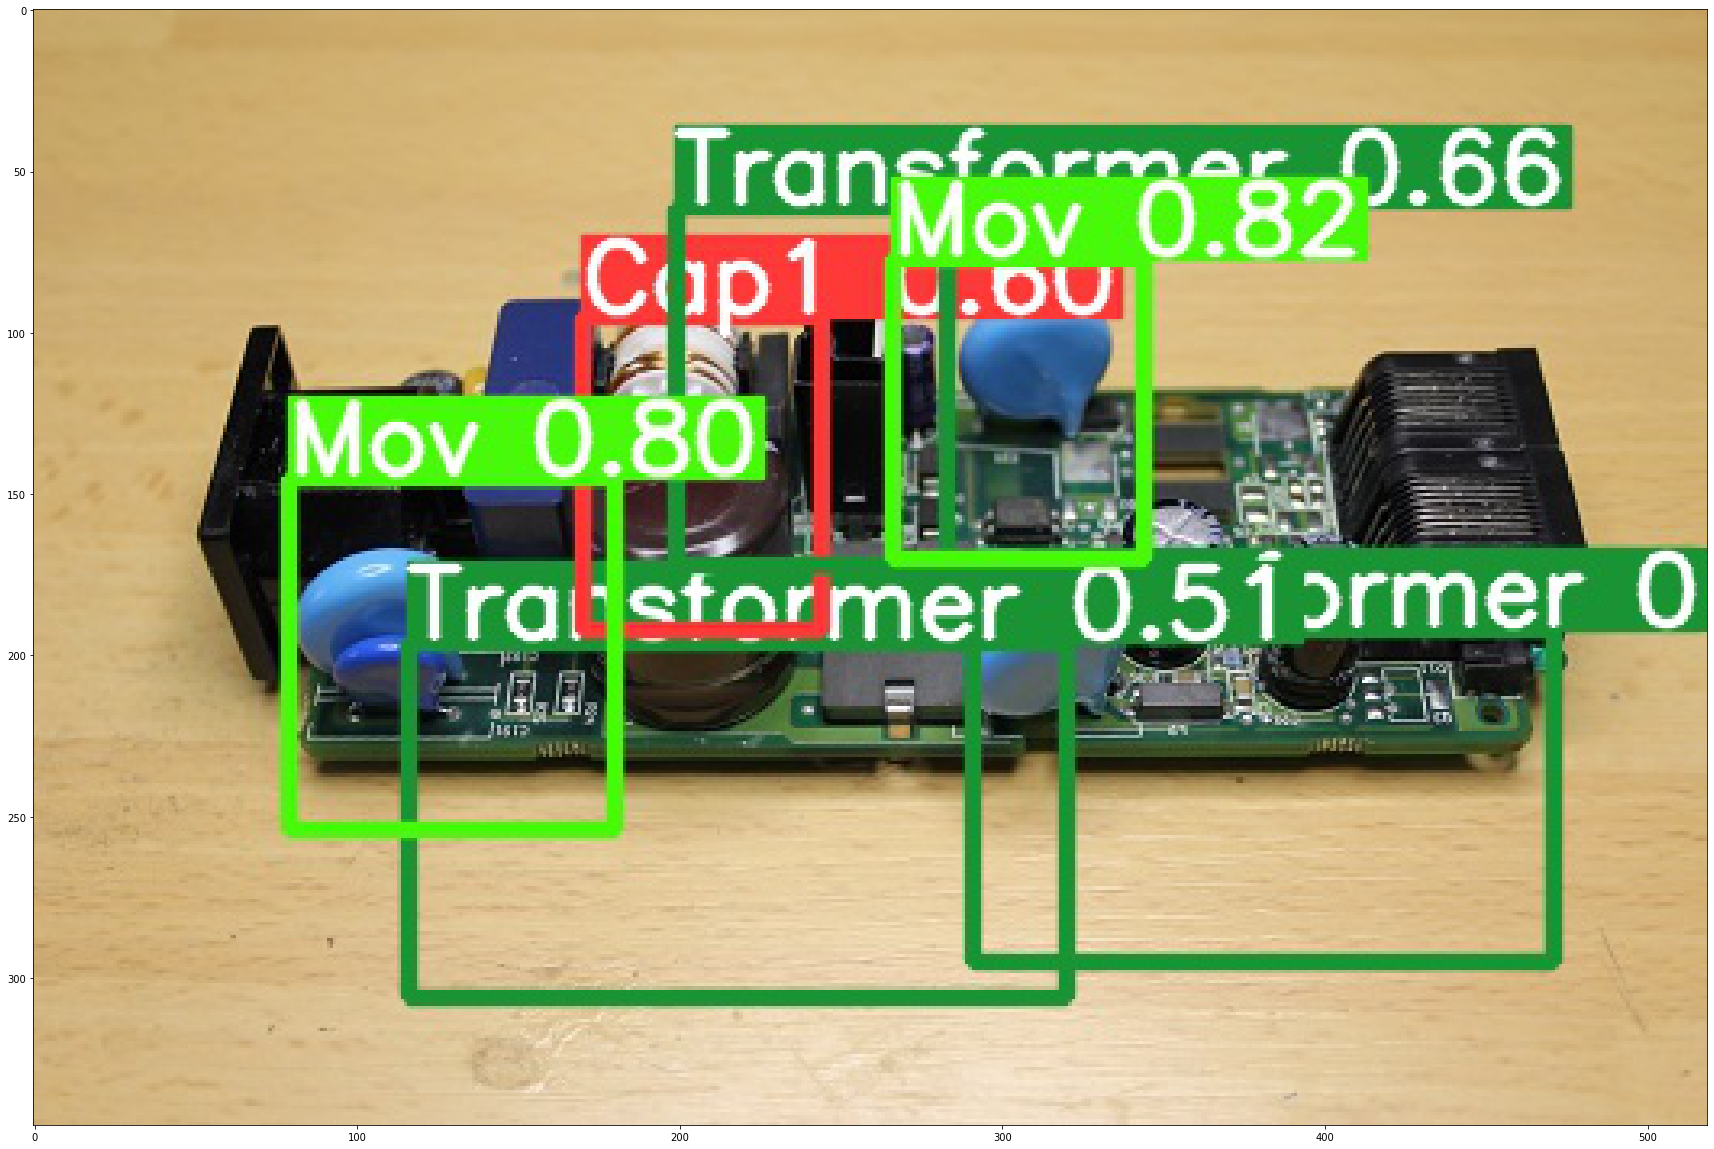

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

src = '/content/drive/MyDrive/Real_PCB/yolov5/runs/detect/exp/' # Images source

files = os.listdir(src) # Getting the files to copy

for idx, image_src in enumerate(files):

  image = Image.open(f'{src}{image_src}',"r")  

  plt.subplots(figsize=(30, 30)) 
  plt.subplot(1,1, (idx+1)), plt.imshow(image, cmap='gray') #2, 3 because you wanna show SIX images

plt.show()